# pyWavelet Snow Radar Processor

In [1]:
#pyWavelet mods
import matfunc
import picklayers
import calcpulse
import qc
import plotradar
import gpstime

#Community packages
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

In [2]:
density_snow = 0.300 #Density of snow on sea ice; See Alexandrov et al., 2010, The Cryosphere
perm_snow = (1+0.51*density_snow)**3  #Density to permitivity
n_snow = np.sqrt(perm_snow) #Permitivity to refractive index
c = 299792458 #Vacuum speed of light

In [3]:
#radar_file = os.path.abspath("C:/Users/kingj/Documents/Projects/2018-2019/250618_Wavelet/pyWavelet/pyWavelet/data/Data_20160419_04_010.mat")
radar_file = os.path.abspath("C:/Projects/pyWavelet/pyWavelet/data/sr/Data_20160419_04_010.mat")
radar_dat =  matfunc.loadmat(radar_file)

Convert the radar's GPS time to UTC and account for leap seconds

In [4]:
utc_time = gpstime.gpstoutc(radar_dat['GPS_time'])
print(time.strftime("%b %d %Y %H:%M:%S", utc_time[3])) #just as an example

Apr 19 2016 13:06:24


In [5]:
bandwidth = np.abs((radar_dat['param_records']['radar']['wfs']['f1']
                    -radar_dat['param_records']['radar']['wfs']['f0'])
                   *radar_dat['param_records']['radar']['wfs']['fmult'])

delta_fast_time = radar_dat['Time'][1] - radar_dat['Time'][0] 
delta_fast_time_range = (delta_fast_time/2)*c

In [6]:
epw, n2n = calcpulse.calcpulsewidth(bandwidth, 'hann')
range_res = epw/2
range_res_snow = range_res/n_snow

### This applies the picklayer function to every trace
TODO: Multi thread

In [21]:
%%time 
l_as,l_si = np.apply_along_axis(picklayers.picklayers, 0, radar_dat['Data'],n2n,delta_fast_time_range,n_snow)

Wall time: 42.1 s


0.28251865766498313


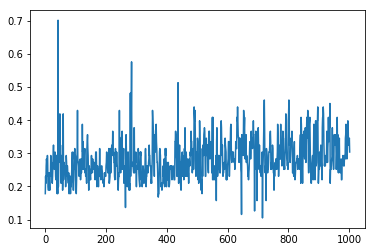

In [22]:
snow_depth = (l_si-l_as)*delta_fast_time_range/n_snow
print(np.mean(snow_depth)) #in m
plt.plot(snow_depth)

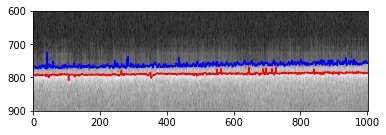

In [23]:
fig, ax = plt.subplots()
ax.imshow(10*np.log10(radar_dat['Data']), interpolation='nearest', cmap="gist_gray")
ax.plot(l_si, color='r')
ax.plot(l_as, color='b')
ax.set_ylim([900, 600])
#fig.rcParams['figure.figsize'] = [500, 5]
plt.show()
